# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Import Dependencies and api key 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
from api_keys import weather_api_key
from api_keys import api_key

# List Range of Lats/Longs
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [77]:
# List for holding lat_longs and cities
lat_longs = []
cities_list = []

# Create a set of random (Lat, long) combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each (Lat, Long) combo
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# view city count to make sure there are enough data points
len(cities_list)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
#create empty lists to hold data from API calls 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
long_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [79]:
print("Starting Api Calls")
print("*******************")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities_list, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        long_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("No Nearby City For Given Coordinates; Skipping Coordinate Pair!")

print("*******************")
print("Api Calls Complete!")
print("*******************")

Starting Api Calls
*******************
Processing Record 1 of Set 1 : norman wells
Processing Record 2 of Set 1 : bethel
Processing Record 3 of Set 1 : dorado
Processing Record 4 of Set 1 : butaritari
Processing Record 5 of Set 1 : clyde river
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : sira
Processing Record 8 of Set 1 : yellowknife
Processing Record 9 of Set 1 : rawson
Processing Record 10 of Set 1 : mega
Processing Record 11 of Set 1 : puerto lopez
Processing Record 12 of Set 1 : puerto ayora
Processing Record 13 of Set 1 : great yarmouth
Processing Record 14 of Set 1 : richards bay
Processing Record 15 of Set 1 : korla
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 16 of Set 1 : ilhabela
Processing Record 17 of Set 1 : atuona
Processing Record 18 of Set 1 : ushuaia
Processing Record 19 of Set 1 : strenci
Processing Record 20 of Set 1 : arrifes
Processing Record 21 of Set 1 : port elizabeth
No Nearby City For Given Co

Processing Record 23 of Set 4 : saint-pierre
Processing Record 24 of Set 4 : upington
Processing Record 25 of Set 4 : mabaruma
Processing Record 26 of Set 4 : mar del plata
Processing Record 27 of Set 4 : prince rupert
Processing Record 28 of Set 4 : kalispell
Processing Record 29 of Set 4 : nantucket
Processing Record 30 of Set 4 : suez
Processing Record 31 of Set 4 : saldanha
Processing Record 32 of Set 4 : maumere
Processing Record 33 of Set 4 : tiksi
Processing Record 34 of Set 4 : grand-santi
Processing Record 35 of Set 4 : barra do garcas
Processing Record 36 of Set 4 : kharian
Processing Record 37 of Set 4 : geraldton
Processing Record 38 of Set 4 : kalmunai
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 39 of Set 4 : kasungu
Processing Record 40 of Set 4 : port hardy
Processing Record 41 of Set 4 : faya
Processing Record 42 of Set 4 : qaqortoq
Processing Record 43 of Set 4 : zhezkazgan
Processing Record 44 of Set 4 : nome
Processing Record 45 

Processing Record 4 of Set 8 : flagstaff
Processing Record 5 of Set 8 : husavik
Processing Record 6 of Set 8 : manjacaze
Processing Record 7 of Set 8 : constitucion
Processing Record 8 of Set 8 : kaitangata
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 9 of Set 8 : ulety
Processing Record 10 of Set 8 : businga
Processing Record 11 of Set 8 : nouakchott
Processing Record 12 of Set 8 : nanortalik
Processing Record 13 of Set 8 : necochea
Processing Record 14 of Set 8 : puerto penasco
Processing Record 15 of Set 8 : vila do maio
Processing Record 16 of Set 8 : hargeysa
Processing Record 17 of Set 8 : lethem
Processing Record 18 of Set 8 : iqaluit
Processing Record 19 of Set 8 : gravenhurst
Processing Record 20 of Set 8 : sartell
Processing Record 21 of Set 8 : lucapa
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 22 of Set 8 : porto velho
Processing Record 23 of Set 8 : torbay
Processing Record 24 of Set 8 : gharghoda
P

Processing Record 29 of Set 11 : fort nelson
Processing Record 30 of Set 11 : imbituba
Processing Record 31 of Set 11 : namibe
Processing Record 32 of Set 11 : mareeba
Processing Record 33 of Set 11 : stornoway
Processing Record 34 of Set 11 : katherine
Processing Record 35 of Set 11 : ruwi
Processing Record 36 of Set 11 : matagami
Processing Record 37 of Set 11 : sao filipe
Processing Record 38 of Set 11 : dalkola
Processing Record 39 of Set 11 : pisco
Processing Record 40 of Set 11 : lagunillas
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 41 of Set 11 : mallaig
Processing Record 42 of Set 11 : alausi
Processing Record 43 of Set 11 : hokitika
Processing Record 44 of Set 11 : north bend
Processing Record 45 of Set 11 : miri
No Nearby City For Given Coordinates; Skipping Coordinate Pair!
Processing Record 46 of Set 11 : kalakamati
Processing Record 47 of Set 11 : camabatela
Processing Record 48 of Set 11 : kloulklubed
Processing Record 49 of Set 11 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
# Create a df with Api call data
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Long" : long_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})



#Check Dataframe
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Norman Wells,75,CA,1633016108,100,65.2820,-126.8329,24.84,3.44
1,Bethel,90,US,1633016067,69,41.3712,-73.4140,62.89,8.05
2,Dorado,40,PR,1633016109,75,18.4588,-66.2677,90.18,5.75
3,Butaritari,100,KI,1633016110,73,3.0707,172.7902,81.66,11.61
4,Clyde River,90,CA,1633016110,75,70.4692,-68.5914,37.63,2.30
...,...,...,...,...,...,...,...,...,...
557,Kloulklubed,100,PW,1633016309,78,7.0419,134.2556,81.10,10.63
558,Tieli,7,CN,1633016310,85,46.9500,128.0500,39.27,5.48
559,Lubumbashi,40,CD,1633016310,33,-11.6609,27.4794,90.09,11.50
560,Araguaçu,30,BR,1633016310,26,-12.9306,-49.8264,100.69,5.88


In [83]:
# will export the cleaned data (humidity <=100) to CSV

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [84]:
#  Get the indices of cities that have humidity over 100%.
# Check to see where Humidity > 100


weather_df.query('Humidity > 100')

# No cities with Humidity > 100

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed


In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# How to filter Humidity less than 100% 
clean_city_data =  weather_df[(weather_df ['Humidity'] <= 100)]

# View Data
clean_city_data

# Save cleaned data to "cities. csv" outfile

clean_city_data.to_csv('cities.csv', encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

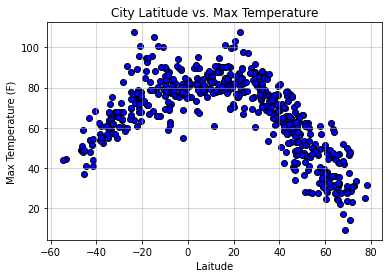

In [90]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

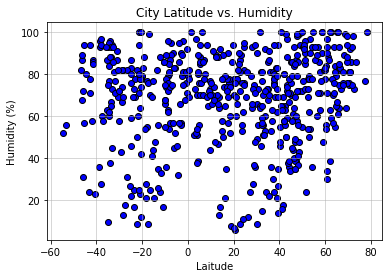

In [91]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Humidity")

# axis label
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save figure 
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

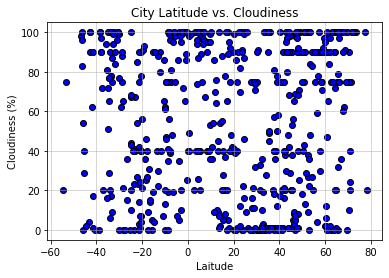

In [92]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

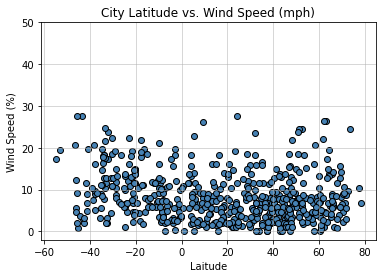

In [93]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [96]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[weather_df["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[weather_df["Lat"] < 0]

# Define linear reg function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"R-squared: {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: -0.85


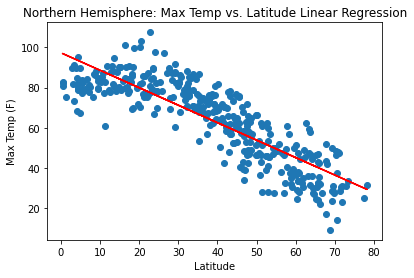

In [97]:
# Run linear reg
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Run Line annotation
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.71


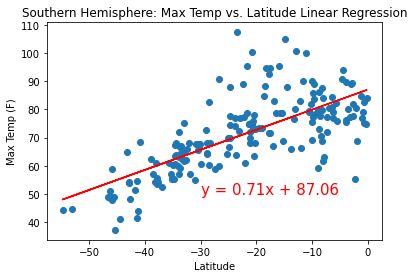

In [98]:
# Run linear reg
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Run Line annotation
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.15


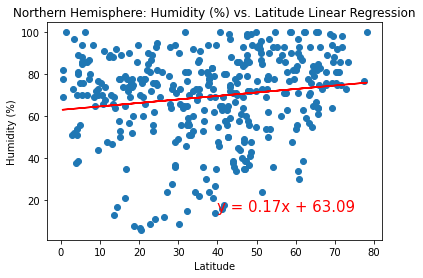

In [99]:
# Run linear reg
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Run Line annotation
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: -0.01


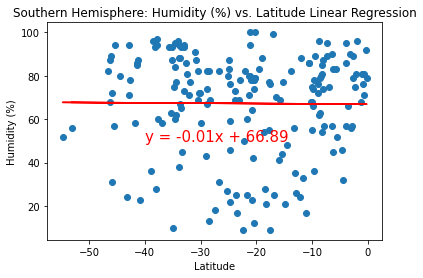

In [100]:
# Run linear reg
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Run Line annotation
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.08


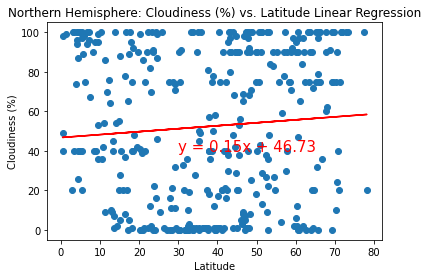

In [101]:
# Run linear reg
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Run Line annotation
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: -0.0


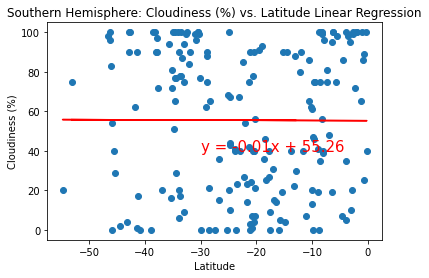

In [102]:
# Run linear reg
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Run Line annotation
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.06


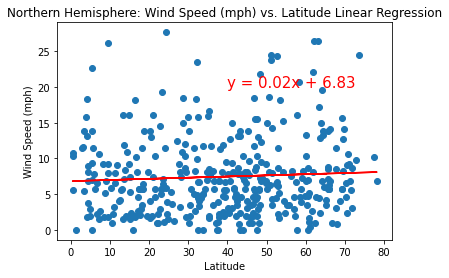

In [103]:
# Run linear reg
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Run Line annotation
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: -0.28


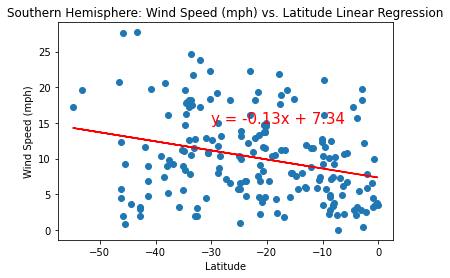

In [104]:
# Run linear reg
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Run Line annotation
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")